In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
geography = pd.get_dummies(data['Geography'],drop_first=True)
gender = pd.get_dummies(data['Gender'],drop_first=True)
geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [7]:
data = pd.concat([data,geography,gender],axis=1)

In [8]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Germany            0
Spain              0
Male               0
dtype: int64

In [9]:
cols = 'RowNumber,CustomerId,Surname,Geography,Gender'.split(',')
data = data.drop(columns=cols)
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [10]:
features = data.drop(columns='Exited')
label = data['Exited']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test ,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=45)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [13]:
x_train

array([[-0.54314547,  2.0207228 , -1.73524323, ..., -0.57812007,
        -0.57330877, -1.10331088],
       [-0.49161743, -0.66001103,  0.68725374, ...,  1.72974448,
        -0.57330877,  0.90636285],
       [ 1.01300132, -0.46853004, -0.00488825, ..., -0.57812007,
        -0.57330877,  0.90636285],
       ...,
       [ 0.90994524, -1.23445399, -0.69703024, ..., -0.57812007,
        -0.57330877, -1.10331088],
       [ 0.37405363, -0.08556807, -1.73524323, ..., -0.57812007,
        -0.57330877,  0.90636285],
       [ 0.24008073,  0.29739391, -0.35095925, ..., -0.57812007,
        -0.57330877, -1.10331088]])

In [14]:
data.corr()['Exited'].sort_values(ascending=True)

IsActiveMember    -0.156128
Male              -0.106512
Spain             -0.052667
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.014001
HasCrCard         -0.007138
EstimatedSalary    0.012097
Balance            0.118533
Germany            0.173488
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [15]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error,accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)
accuracy_score((model.predict(x_test)>0.5),y_test)

0.814

In [16]:
from sklearn.model_selection import cross_val_score
a= cross_val_score(model,x_train,y_train,cv=3)

In [17]:
a.mean()

0.8095001346887153

In [18]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
# from tensorflow.keras.layers import pRelu,Elu,LeakyRelu

In [19]:
# creating a empty neural network
model = Sequential()

In [20]:
# adding a 6 neurons using he_uniform works with relu activation function and my 
# input of 11 features
model.add(Dense(units=6,kernel_initializer='he_normal'
                ,activation='relu',input_dim=11))

In [21]:
# first hidden layer
model.add(Dense(units=10,kernel_initializer='he_normal'
                ,activation='relu',input_dim=11))

In [22]:
# Second hidden layer
model.add(Dense(units=20,kernel_initializer='he_normal',activation='relu'))

In [23]:
# third hidden layer
model.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))

In [24]:
# giving a final layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 10)                70        
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 15)                315       
                                                                 
 dense_4 (Dense)             (None, 1)                 16        
                                                                 
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


In [27]:
neural_network = model.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5268 - accuracy: 0.7914 - val_loss: 0.4960 - val_accuracy: 0.7948
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4775 - accuracy: 0.7975 - val_loss: 0.4675 - val_accuracy: 0.8001
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4404 - accuracy: 0.8044 - val_loss: 0.4261 - val_accuracy: 0.8122
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8210 - val_loss: 0.3900 - val_accuracy: 0.8311
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3774 - accuracy: 0.8442 - val_loss: 0.3807 - val_accuracy: 0.8387
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3716 - accuracy: 0.8461 - val_loss: 0.3857 - val_accuracy: 0.8364
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3660 - accuracy: 0.8474 - val_loss: 0.3854 - val_accuracy: 0.8300

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3322 - accuracy: 0.8645 - val_loss: 0.3499 - val_accuracy: 0.8626
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.8642 - val_loss: 0.3616 - val_accuracy: 0.8519
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3317 - accuracy: 0.8617 - val_loss: 0.3504 - val_accuracy: 0.8633
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3308 - accuracy: 0.8660 - val_loss: 0.3480 - val_accuracy: 0.8603
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3306 - accuracy: 0.8666 - val_loss: 0.3470 - val_accuracy: 0.8629
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8653 - val_loss: 0.3537 - val_accuracy: 0.8603
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8627 - val_loss: 0.3508 - val_accuracy:

In [28]:
y_pred = model.predict(x_test)

63/63 [==============================] - 0s 791us/step


In [29]:
y_npred = (y_pred>0.5)

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_npred)

In [31]:
cm

array([[1519,   62],
       [ 233,  186]], dtype=int64)

In [32]:
score = accuracy_score(y_npred,y_test)

In [33]:
score

0.8525

In [34]:
neural_network

In [35]:
neural_network.history

{'loss': [0.5268227458000183,
  0.4774627983570099,
  0.4403679072856903,
  0.4003816545009613,
  0.3774307370185852,
  0.37156811356544495,
  0.3659646511077881,
  0.3640158772468567,
  0.362130731344223,
  0.359512060880661,
  0.35846033692359924,
  0.3583051860332489,
  0.3576073944568634,
  0.35539495944976807,
  0.35489654541015625,
  0.35361310839653015,
  0.352525919675827,
  0.35223376750946045,
  0.35101115703582764,
  0.35164451599121094,
  0.3502574563026428,
  0.34701380133628845,
  0.34722432494163513,
  0.34715157747268677,
  0.3457328975200653,
  0.34372276067733765,
  0.3434375822544098,
  0.34474003314971924,
  0.3442689776420593,
  0.3421926200389862,
  0.3415732681751251,
  0.34165263175964355,
  0.3404673933982849,
  0.34075725078582764,
  0.33931484818458557,
  0.33748820424079895,
  0.33966222405433655,
  0.3388434648513794,
  0.33618292212486267,
  0.3361060321331024,
  0.3370189666748047,
  0.33710190653800964,
  0.3349408507347107,
  0.3353433310985565,
  0.335

In [36]:
neural_network.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
nna= neural_network.history['accuracy']
nnva = neural_network.history['val_accuracy']

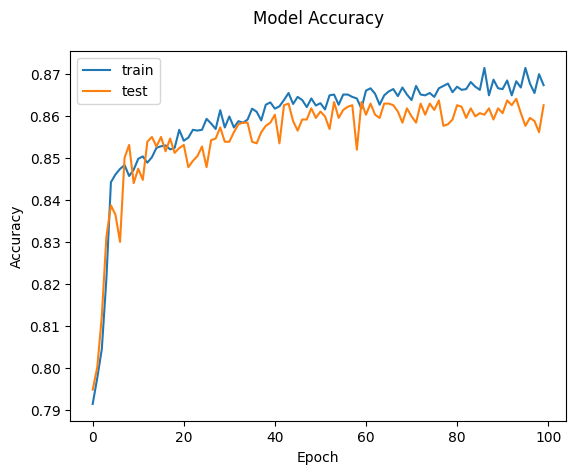

In [38]:
plt.plot(nna)
plt.plot(nnva)
plt.title('Model Accuracy',pad=20)
plt.ylabel("Accuracy")
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')

In [39]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [40]:
from keras.layers import Dense,Activation,Embedding,Flatten,LeakyReLU,BatchNormalization
from keras.activations import relu,sigmoid

In [41]:
def create_model(layers,activation):
    model =Sequential()
    for i , nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=x_train.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
        model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')
        return model
            

In [42]:
model = KerasClassifier(build_fn=create_model,verbose=0)

C:\Users\yogeswarvenkatsai\AppData\Local\Temp\ipykernel_15328\2246426747.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,verbose=0)


In [43]:
layers = [[20],[40,30],[40,20],[45,30,15],[30,30,30]]
activation = ['relu','sigmoid']
para_grid = dict(layers=layers,activation=activation,batch_size=[128,256],epochs=[100])

In [44]:
grid = GridSearchCV(estimator=model,param_grid=para_grid,cv=5)

In [ ]:
grid_result = grid.fit(x_train,y_train)

In [ ]:
pred_y = grid.predict(x_test)
cm = confusion_matrix((pred_y>0.5),y_test)
score = accuracy_score((pred_y>0.5),y_test)

In [ ]:
score

In [ ]:
print(grid_result.best_score_,grid_result.best_params_)

In [ ]:
nn = create_model([45,30,15],'relu')

In [ ]:
nn.fit(x_train,y_train,epochs=100,batch_size=128)

In [ ]:
py= nn.predict(x_test)

In [ ]:
accuracy_score((py>0.5),y_test)